In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('../data/usedCarListingCleaned.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9984, 22)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,BMW,['X3'],xDrive28i AWD,Marietta,GA,77549,16709,Mineral White Metallic,Mocha,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,1
1,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Deland,FL,11624,26985,Shadow Black,Medium Earth Gray,...,2.7L V-6 Gas Turbocharged,Automatic,4WD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Personal or Rental Use,Clean,1
2,2018,GMC,"['Savana', 'Cargo', 'Van']",2500 Short Wheelbase,Pelham,AL,23997,19990,Summit White,Unknown,...,6.0L V-8 Gas,Automatic,RWD,Gas,"['Cruise Control', 'Backup Camera']",False,0,Personal or Rental Use,Clean,1
3,2017,Nissan,['Rogue'],SV AWD,Palmetto Bay,FL,78116,9997,Magnetic Black,Charcoal,...,2.5L Inline-4 Gas,Automatic,AWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Back...",False,2,Fleet or Mixed Use,Clean,1
4,2017,Toyota,['RAV4'],XLE AWD,Great Falls,MT,189335,13495,Super White,Black,...,2.5L Inline-4 Gas,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,1


# 0. Data overview

In [46]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

In [47]:
df.describe(include='all')

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
count,9984.000000,9984,9984,9984,9984,9984,9984.000000,9984.000000,9984,9984,...,9984,9984,9984,9984,9984,9984,9984.000000,9984,9984,9984.000000
unique,NaN,53,498,1826,1564,50,NaN,NaN,1049,558,...,179,2,4,7,192,2,NaN,2,5,NaN
top,NaN,Ford,['F-150'],SE FWD,Houston,TX,NaN,NaN,Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,[],False,NaN,Personal or Rental Use,Clean,NaN
freq,NaN,2604,687,601,162,1124,NaN,NaN,603,2172,...,1082,9704,5380,9376,3718,9314,NaN,7776,9868,NaN
mean,2014.489483,NaN,NaN,NaN,NaN,NaN,71303.843249,14466.788462,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.231671,NaN,NaN,1.680589
std,4.462235,NaN,NaN,NaN,NaN,NaN,51084.658332,9746.594730,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.519975,NaN,NaN,1.079825
min,1997.000000,NaN,NaN,NaN,NaN,NaN,5.000000,1500.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,33886.250000,8495.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
50%,2016.000000,NaN,NaN,NaN,NaN,NaN,55045.000000,12999.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,99422.500000,17704.750000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000


### Vehicle information summary
1. Model years between 1997-2020
2. Mileage ranging 5 miles to 484,773 miles
3. Price ranging from 1,500 to about 214,900 dollars
4. There are 
9984 unique listings, 
53 Makes, 
498 Models, 
1049 unique exterior colors, 
558 unique interior colors, 
179 unique engines, 
2 unique transmission, 
4 unique drive type, 
7 unique fuel type, 
2 different used type (cpo or used)

### Vehicle history
1. 2 unique usage type
2. 5 unique titles
3. Number of accidents ranging from 0 to 5
4. Number of previous owners raning from 0(rental car, assuming no previous owners) to 13

## Vehicle geospatial info
1. 50 states
2. 1564 cities

# 1. Vehicle listing count analysis

## 1.1 Vehicle listings for different years

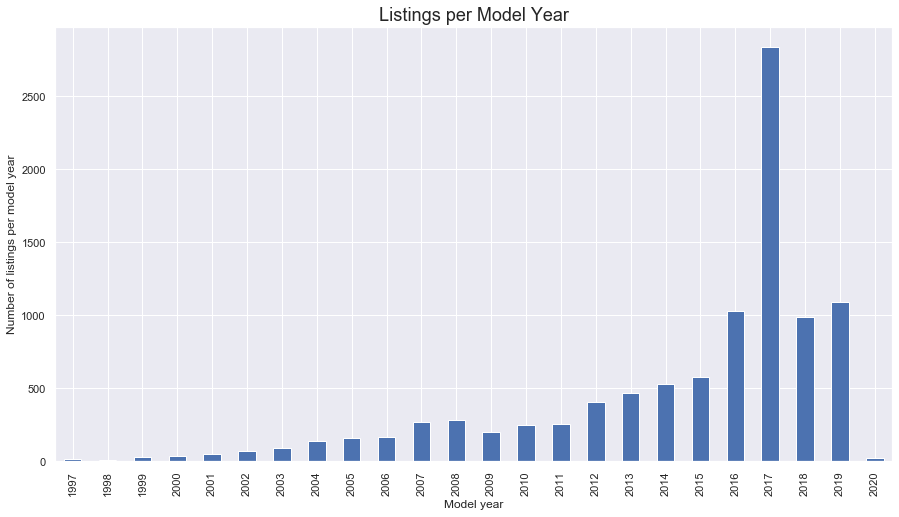

In [48]:
df.groupby(['year'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per model year', fontsize=12)
plt.xlabel('Model year', fontsize=12)
plt.title('Listings per Model Year', fontsize=18)
plt.show()

In [49]:
df[df['year']==2017]['year'].count()/df['year'].count()

0.2839543269230769

### Main findings:

3-year used cars take dominants and account for about 28% of total used car listings. 

One important reason is that 3-year lease cars are very popular and after three-year lease, the car users will return the leased car to dealers and dealers will list them as used cars online.

## 1.2 Vehicle listings from different states

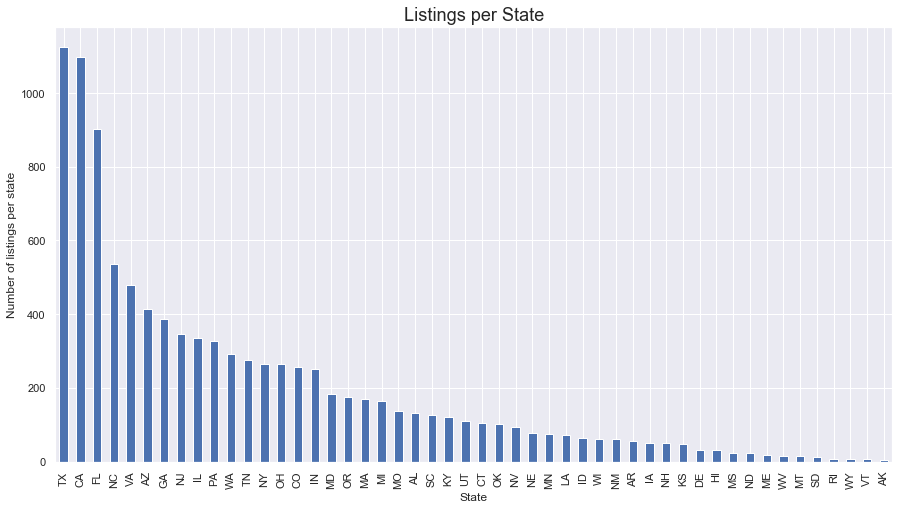

In [50]:
df.groupby(['state'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

In [51]:
len(df[(df.state=='TX') | (df.state=='CA')|(df.state=='FL')])/len(df)

0.312900641025641

### Main findings:
Texas, California and Florida are the 3 states with the largest numbers of used car listings, and these three states account for 31% of US used car markets. 

The main reason is that, from wiki,https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population, we know that the top 3 states with most population are CA, TX and FL. The car ownership is strongly positively correlated with population, so is the used car number. 

Therefore, it makes sense that CA, TX and FL, the top 3 populous states, also have the largest number of used car listings.

## 1.3 Vehicle listings for different carmakers

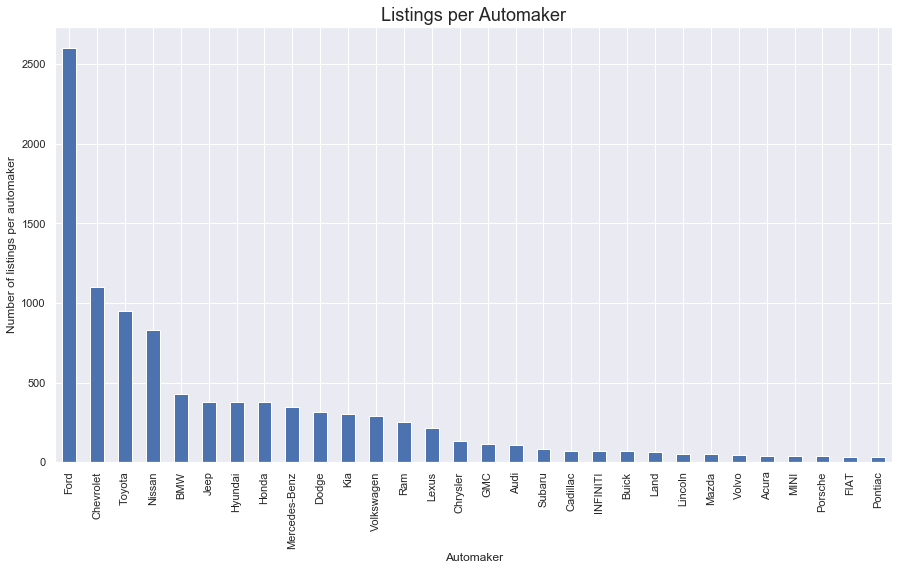

In [54]:
## Only listing the top 30 car makers for better visualization
df.groupby(['make'])['year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

In [56]:
len(df[(df.make=='Ford') | (df.make=='Chevrolet')|(df.make=='Toyota')|(df.make=='Nissan')])/len(df)

0.5487780448717948

## Main findings:
Ford is the domimant brand on the used car market. And Chevrolet, Toyota, Nissan are another top 4 makers. Totally they account for about 55% of the used car listings. 

Ford and Chevrolet are two US brands that lots of consumers like to purchase (maybe because of US brand, brand loyalty, etc). Toyota and Nissan are two Japanese brands which represent for cost-benefit efficient cars and their used cars works very well after long-time use. 

However, it is surprising to see that Honda only ranks 8th in the used car market.

## 1.4 Vehicle listings for different title


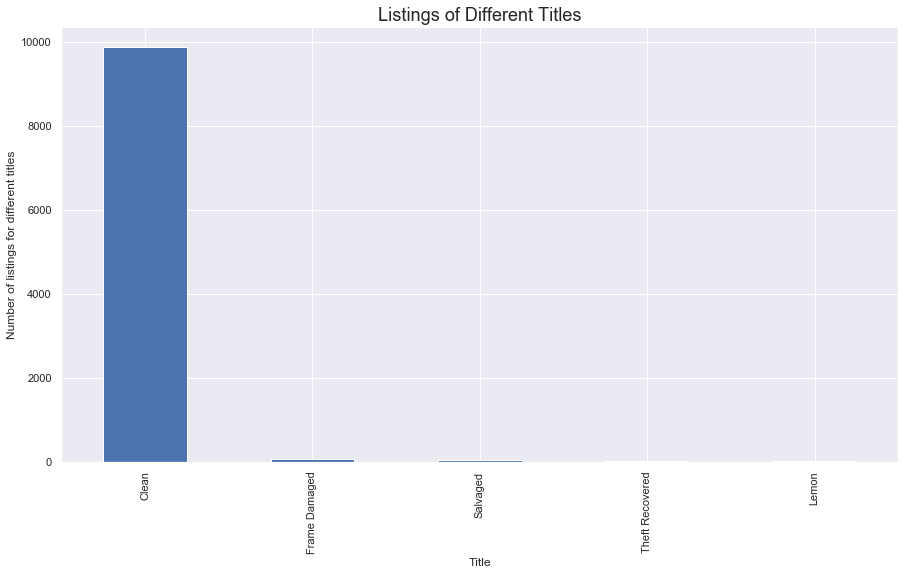

In [57]:
df.groupby(['title'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different titles', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.title('Listings of Different Titles', fontsize=18)
plt.show()

In [58]:
len(df[df.title=='Clean'])/len(df)

0.9883814102564102

 98.8% of the used cars have a clean title and only about 1.2% of the vehicles have some problematic titles such as Frame Damaged, Salvaged, Theft Recovered or Lemon car.

## 1.5 Vehicle listings for different number of accidents

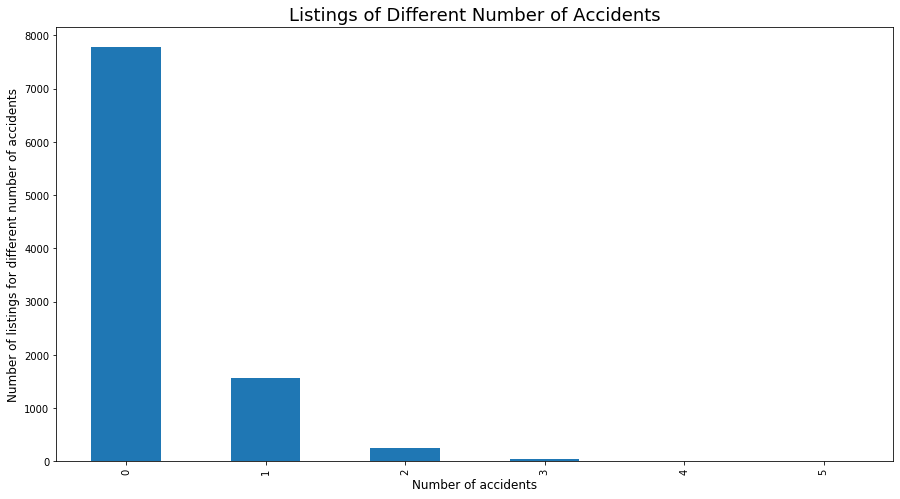

In [10]:
df.groupby(['num_accident'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

## 1.6 Vehicle listings for different number of previous owners

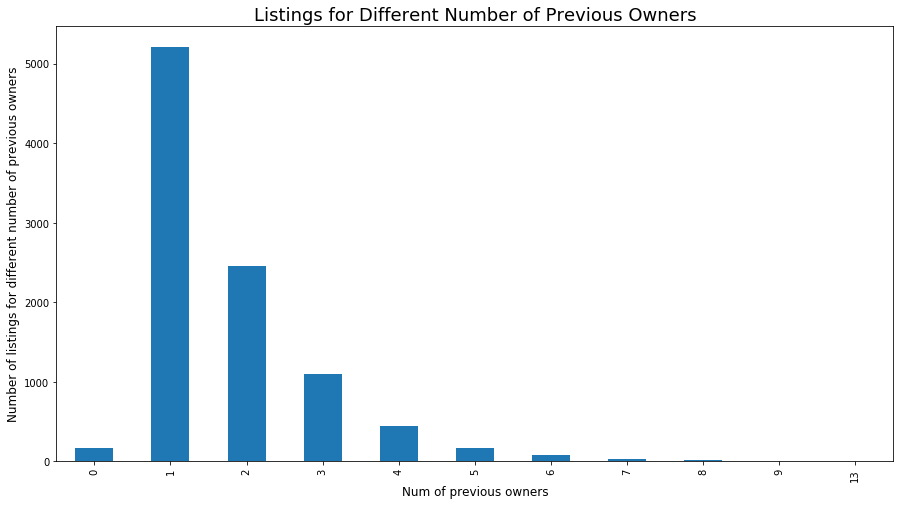

In [11]:
df.groupby(['num_owner'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of previous owners', fontsize=12)
plt.xlabel('Num of previous owners', fontsize=12)
plt.title('Listings for Different Number of Previous Owners', fontsize=18)
plt.show()

Most of the cars have 1 or 2 or 3 owners, and some cars have zero owners (means the cars are leased so there is no pre-ownener. There are a few cars have very high number of previous owners, such as 8, 9 or even 13.

In [65]:
# checking cars with over 8 pre-owners
df[(df.num_owner>7)]

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
33,2019,Chevrolet,['Impala'],LT with 1LT,Pikeville,KY,30434,16000,Summit White,Jet Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Remote Engine Start', 'Backup Camera', 'Crui...",False,0,Personal or Rental Use,Clean,0
39,2016,Ford,['F-150'],XLT SuperCrew 6.5' Box 4WD,Troy,NY,37465,28900,Silver,Black,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
47,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Fort Wayne,IN,29421,28488,Brown,Unknown,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
79,2019,Dodge,"['Grand', 'Caravan']",SXT,Phoenix,AZ,32998,14950,Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,0
80,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Oak Park,MI,37750,24990,White,Unknown,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,2014,Ram,['2500'],SLT Crew Cab 8' Box 4WD,Oak Park,MI,60299,20770,White,Unknown,...,5.7L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
9828,2019,Ford,['F-150'],XLT SuperCrew 6.5' Box 4WD,Salt Lake City,UT,9609,31557,Ingot Silver Metallic,Medium Earth Gray,...,5.0L V-8 Gas,Automatic,4WD,Gas,"['Remote Engine Start', 'Backup Camera', 'Crui...",False,0,Personal or Rental Use,Clean,0
9877,2019,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Seekonk,MA,13559,29500,Oxford White,Medium Earth Gray,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,"['Remote Engine Start', 'Backup Camera', 'Crui...",False,0,Personal or Rental Use,Clean,0
9899,2018,Chevrolet,['Cruze'],LT with 1SD Hatchback Automatic,Charlottesville,VA,7257,13025,Black,Jet Black,...,1.4L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Blue...",False,0,Personal or Rental Use,Clean,0


In [67]:
# Check cars with 0 num_owners
df[df.num_owner == 0].head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
33,2019,Chevrolet,['Impala'],LT with 1LT,Pikeville,KY,30434,16000,Summit White,Jet Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Remote Engine Start', 'Backup Camera', 'Crui...",False,0,Personal or Rental Use,Clean,0
39,2016,Ford,['F-150'],XLT SuperCrew 6.5' Box 4WD,Troy,NY,37465,28900,Silver,Black,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
47,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Fort Wayne,IN,29421,28488,Brown,Unknown,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
79,2019,Dodge,"['Grand', 'Caravan']",SXT,Phoenix,AZ,32998,14950,Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,0
80,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Oak Park,MI,37750,24990,White,Unknown,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0


The vehicles with too many pre-owners seem reasonable to me. Their model year is pretty old and have a very high mileage.

The vehicles with zero pre-owners should be leased car, and these vehicles are either returned to dealers after lease time or returned before lease time. And then these vehicles are listed online for resell and their number of previous owners is zero.

## 1.7 Vehicle listings for different usage type

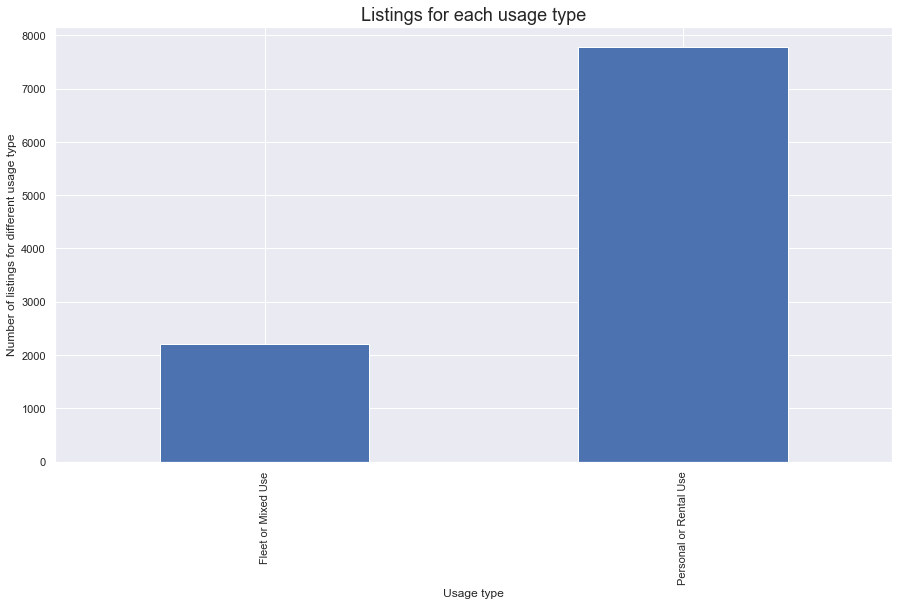

In [63]:
df.groupby(['usage_type'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different usage type', fontsize=12)
plt.xlabel('Usage type', fontsize=12)
plt.title('Listings for each usage type', fontsize=18)
plt.show()

In [64]:
len(df[df.usage_type=='Personal or Rental Use'])/len(df)

0.7788461538461539

In [68]:
df.groupby('usage_type')['mileage'].mean()

usage_type
Fleet or Mixed Use        77509.143569
Personal or Rental Use    69541.844393
Name: mileage, dtype: float64

About 78% of the listed cars are for personal or rental use. Usually personal and leased car will have a lower mileage compared with fleet cars. 

The above results show that the average mileage for personal or rental cars is about 69.5k miles compared with 77.5k miles for fleet or mixed use.

Fleet or Mixed Use: Fleet use is for companies such as Car rental company, police depearment, taxicab company, public utility companies.

Personal or Rental Use: Leased car or personal car.

## 1.8 Exterior color(select top 20 colors)

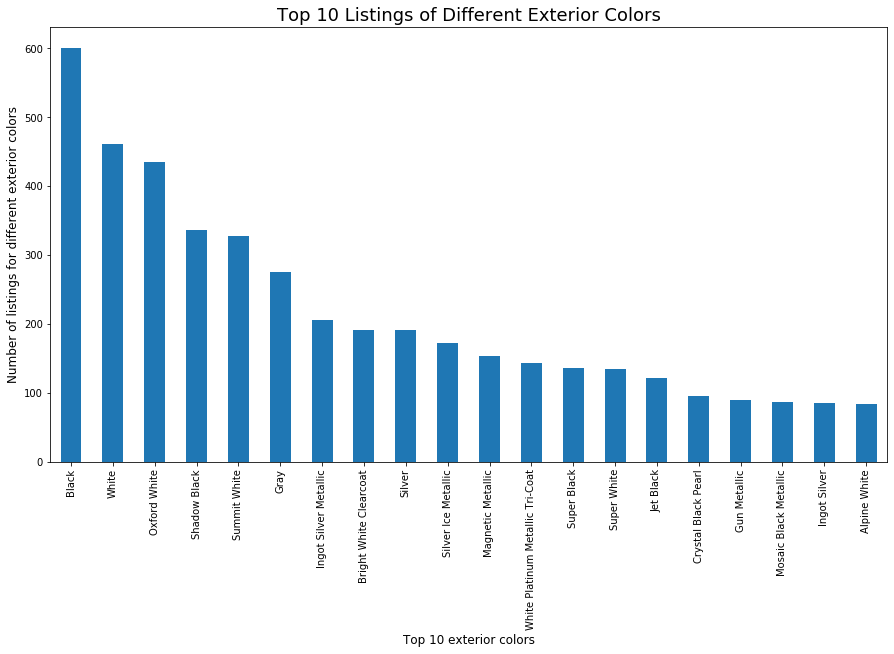

In [13]:
df.groupby(['exterior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different exterior colors', fontsize=12)
plt.xlabel('Top 10 exterior colors', fontsize=12)
plt.title('Top 10 Listings of Different Exterior Colors', fontsize=18)
plt.show()

From the above charts, the top three colors are Black, White and Oxford White. However, due to the different description of the similar colors, such as White and Oxford White, which we can combine as the same White color, we may need to combine some similar colors. Due to the time constraint, I will not spend time here.

## 1.9 Interior color(select top 20 colors)

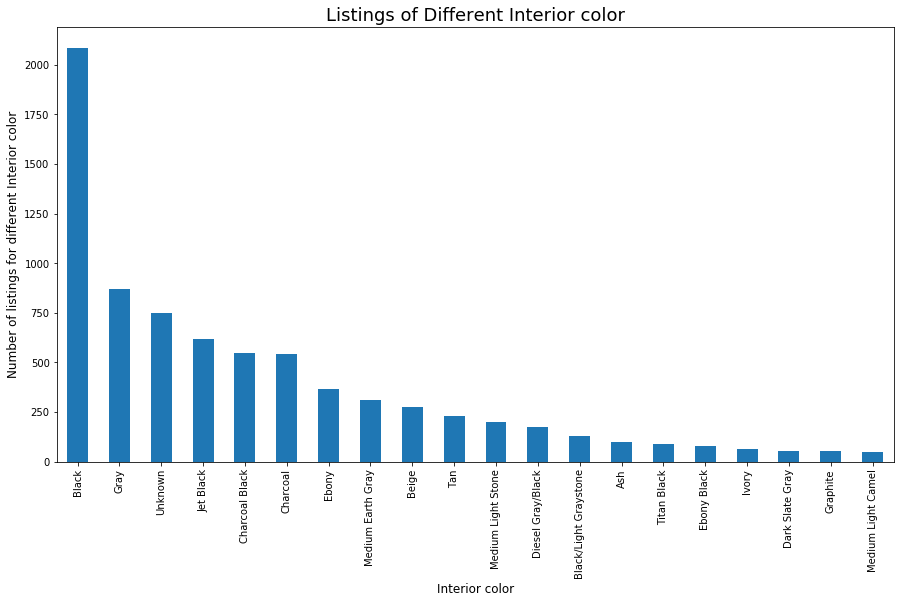

In [14]:
df.groupby(['interior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different Interior color', fontsize=12)
plt.xlabel('Interior color', fontsize=12)
plt.title('Listings of Different Interior color', fontsize=18)
plt.show()

Except the unknown interior color, the top three colors are Black, Gray and Jet Black. It seems, different Black colors and Gray are the most popular colors for used car interior.

## 1.10 MPG for both city and highway

### mpg_city

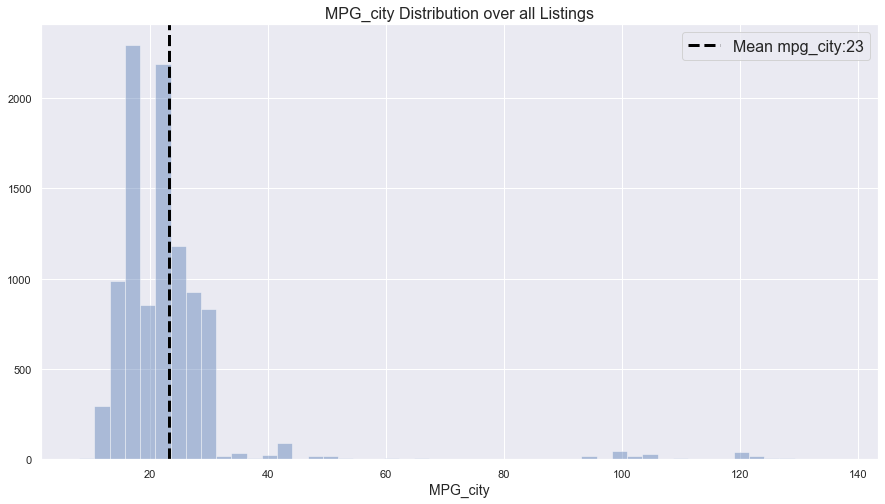

In [70]:
# look at mpg_city overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_city,kde=False)
plt.xlabel('MPG_city',fontsize=14)
plt.axvline(df.mpg_city.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_city:'+'{0:.0f}'.format(np.mean(df.mpg_city)))
plt.title('MPG_city Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [71]:
df.groupby('fuel_type')['mpg_city'].mean()

fuel_type
CNG          27.000000
Diesel       22.613260
Electric    117.893617
Gas          21.018558
Hybrid       41.096330
Hydrogen     66.000000
Plug-In     100.166667
Name: mpg_city, dtype: float64

The average mpg is about 23. The city mpg for the used cars are pretty normally between 10 to 30, which is very normal mpg values for most of the gasoline and diesel cars. However, there are some outliers which have either around 40 mpg or much higher mpg around 100 and 120.

From the above groupby analysis, we can see that the reason for the very high mpg could the high mpg for alternative fuel vehicles such as electric, hybrid, hydrogen, plug-in cars. Since these vehicles either have a very fuel efficient engine and energy recovery system onboard, or do not use gasoline for fuel (they use electric or hydrogen for fuel), these vehicles will have very high mpg when converting electric or hydrogen to gasoline equivalent.

### mpg_hwy

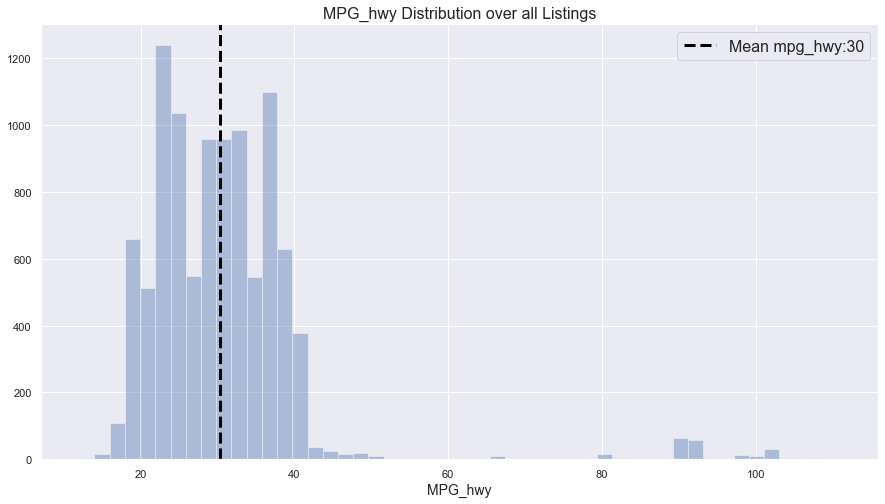

In [69]:
# look at mpg_hwy overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_hwy,kde=False)
plt.xlabel('MPG_hwy',fontsize=14)
plt.axvline(df.mpg_hwy.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_hwy:'+'{0:.0f}'.format(np.mean(df.mpg_hwy)))
plt.title('MPG_hwy Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [72]:
df.groupby('fuel_type')['mpg_city'].mean()

fuel_type
CNG          27.000000
Diesel       22.613260
Electric    117.893617
Gas          21.018558
Hybrid       41.096330
Hydrogen     66.000000
Plug-In     100.166667
Name: mpg_city, dtype: float64

The average mpg for highway is 30, higher than for city roads which is reasonable and easy to explain. The reason is that engine is more efficient when it is running on fast speed and continuous driving on highways, while on city roads, cars will run on a lower speed and sometimes stop and go, which will reduce the mpg significantly.

The reason for mpg_city outliers above also applies here for mpg_hwy outliers.

## 1.11 Transmission, Drive_type for Listings

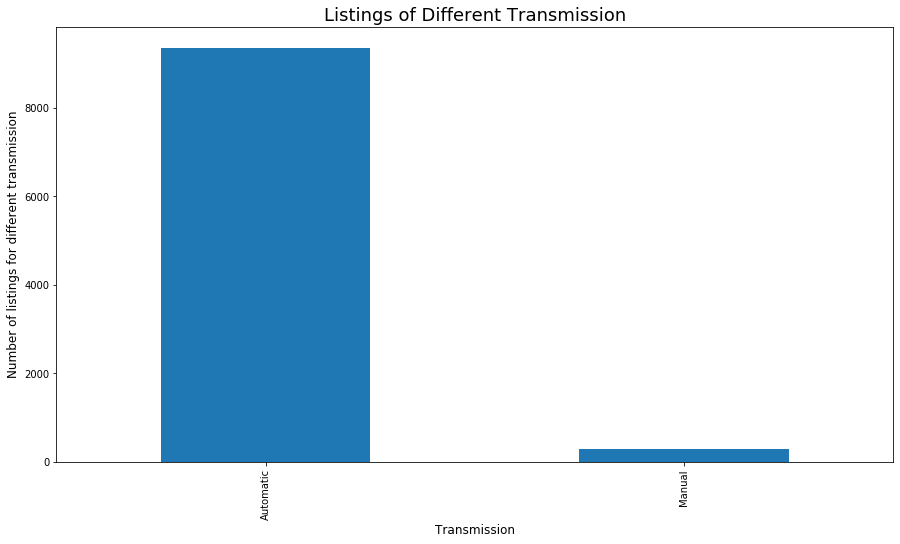

In [17]:
df.groupby(['transmission'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different transmission', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.title('Listings of Different Transmission', fontsize=18)
plt.show()

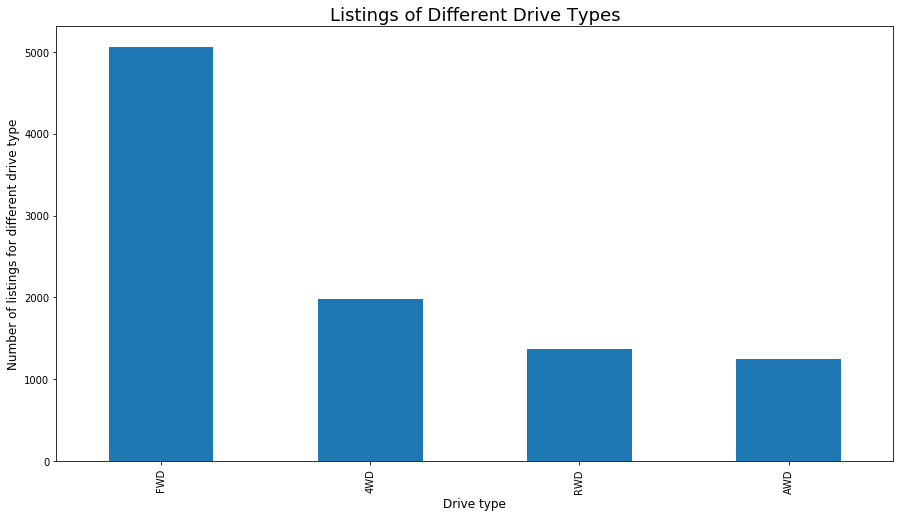

In [18]:
df.groupby(['drive_type'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different drive type', fontsize=12)
plt.xlabel('Drive type', fontsize=12)
plt.title('Listings of Different Drive Types', fontsize=18)
plt.show()

Most of the used cars are automatic and FWD from the above visualization.

## 1.12 Listings for either Certified Pre-owned or not

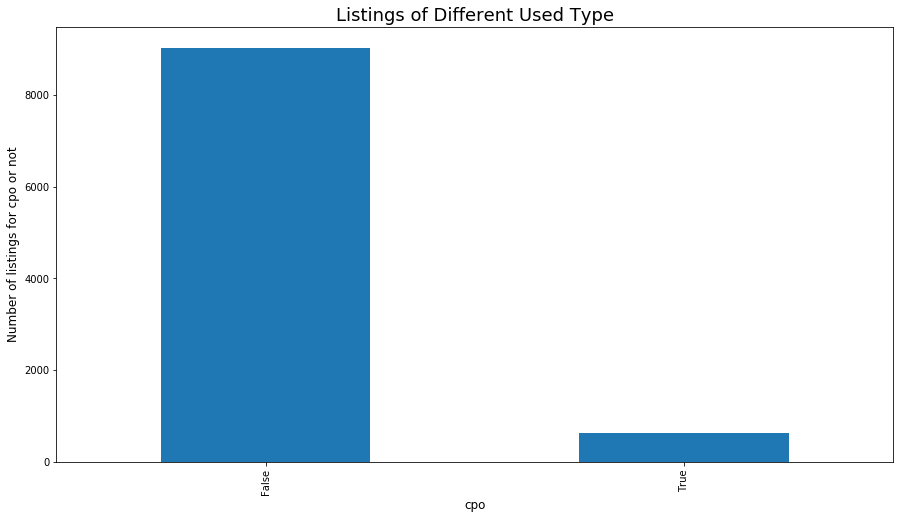

In [19]:
df.groupby(['cpo'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for cpo or not', fontsize=12)
plt.xlabel('cpo', fontsize=12)
plt.title('Listings of Different Used Type', fontsize=18)
plt.show()

In [73]:
len(df[df.cpo==True])/len(df)

0.06710737179487179

Certified preowned used cars only account for about 6.7% of total online used car listings.

## 1.13 Price distribution

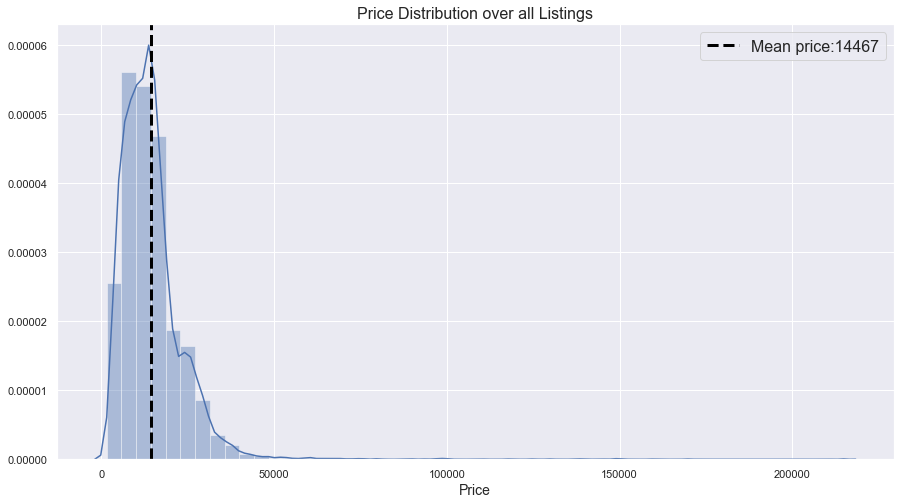

In [74]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('Price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [75]:
df['price'].mean(), df['price'].median()

(14466.788461538461, 12999.0)

The average price is about $14,467 and the median price of used cars is $12,999.

The price distribution is more like a long-tail distribution and have right-skewness, which is very normal in price/value/cost distribution. We usually take a log transformation to convert to a normal distribution when we want to predict Price as a response variable.

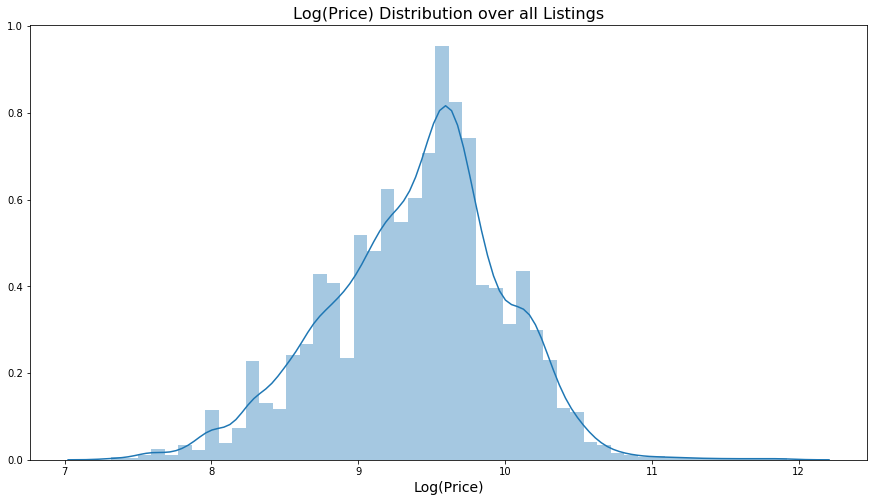

In [21]:
# log transformation for price. 
# After the transformation, the distribution is more like a normal distribution
plt.figure(figsize=(15,8))
log_price = np.log(df.price)
sns.distplot(log_price,kde=True)
plt.xlabel('Log(Price)',fontsize=14)
plt.title('Log(Price) Distribution over all Listings',fontsize=16)
plt.show()

## 1.14 Mileage distribution

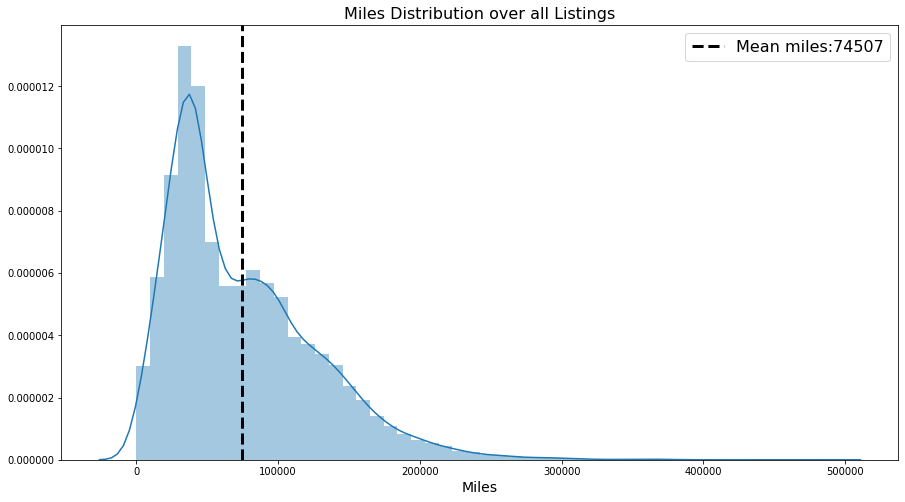

In [22]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mileage,kde=True)
plt.xlabel('Miles',fontsize=14)
plt.axvline(df.mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.mileage)))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [77]:
df['mileage'].mean(), df['mileage'].median()

(71303.84324919872, 55045.0)

The mean mileage is about 71k miles while the median mileage is much lower, which is only about 55k. The reason for this is the extremely high mileage outliers in the distribution, which also resulted in the long-tail distribution.

### Log transformation for miles

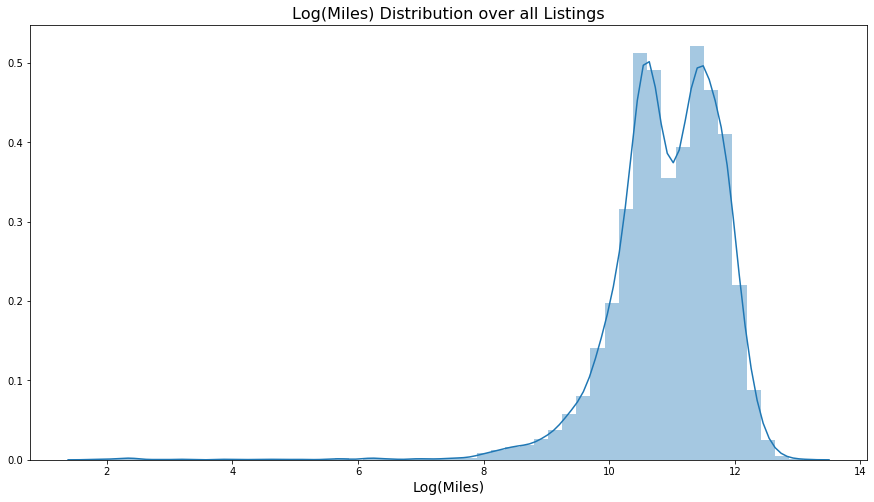

In [23]:
# It's not a normal distribution(a little bit right-skewed), try log transformation
fig = plt.figure(figsize=(15,8))
log_mile = np.log(df.mileage)
sns.distplot(log_mile,kde=True)
plt.xlabel('Log(Miles)',fontsize=14)
plt.title('Log(Miles) Distribution over all Listings',fontsize=16)
plt.show()
# But the log one is also not that good.. I will keep the original distribution

The log transformation for an independent variable is not necessary and also, the log transformation above is not ideal as well.

# 2. How price is related to other variables

### We want to know what variables are related to the resell price such as the model year, make, mpg, mileage, etc.

In [78]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

## 2.1 How the model year affect the price

### We want to know how the model is affected by model year in general

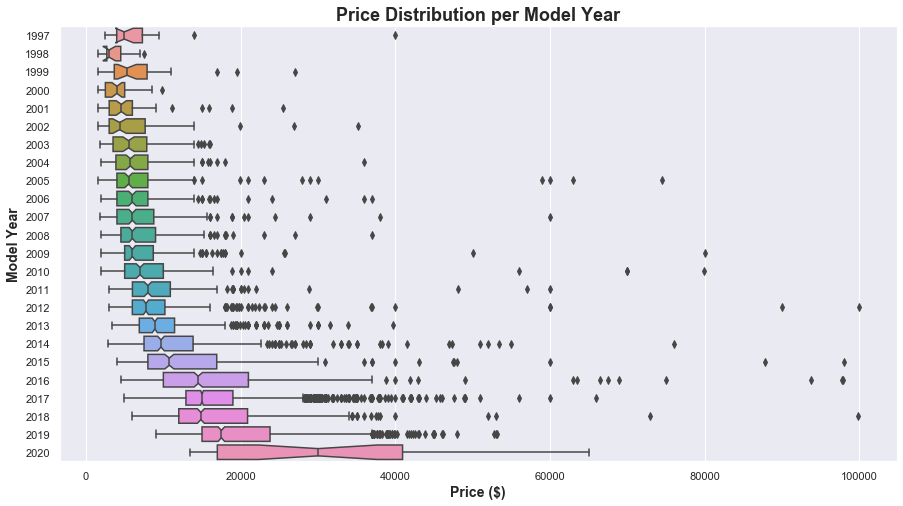

In [79]:
# look at price by year boxplot
# In order to better visualize the impact, I will limit the price up to 100,000
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='year',data=df[df.price <= 100000],
            order=sorted(df.year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.show()

The above plots show that as the model year increase, the mean price is increasing and the range is also expanding. Specially for model year 2020, the price range is very large due to limited number of listings of mode year 2020.

## 2.2 How does the automaker impact price?

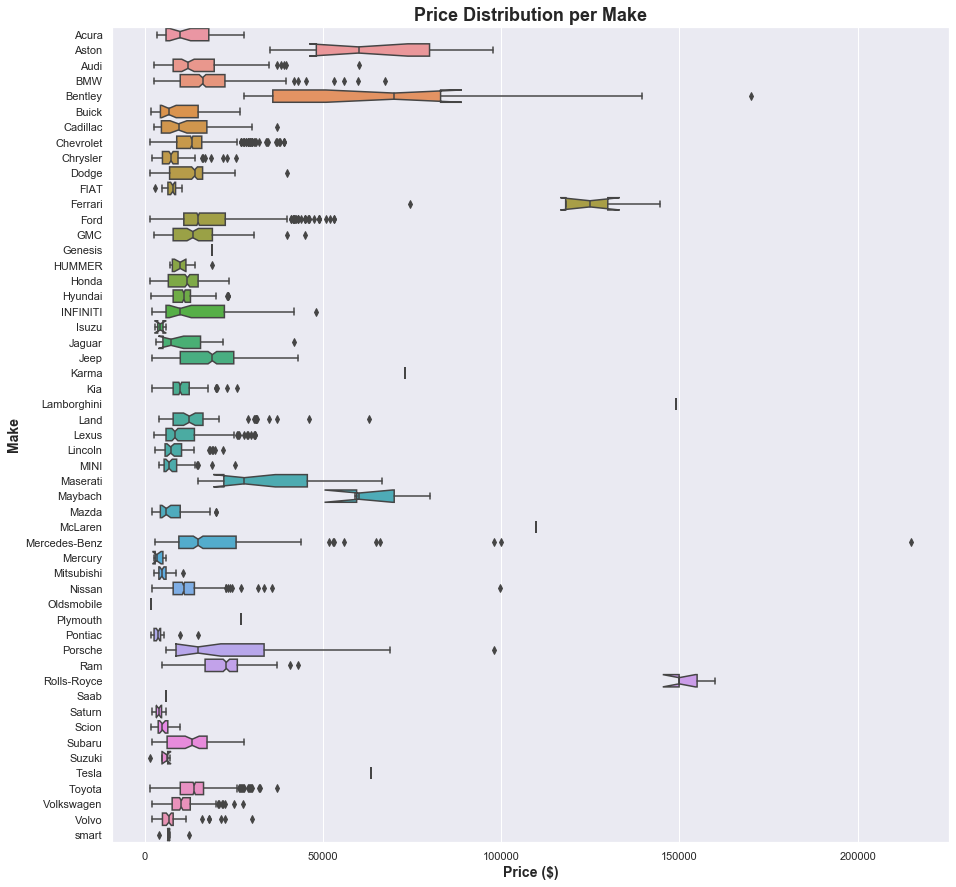

In [80]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.boxplot(x='price',y='make',data=df,
            order=sorted(df.make.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

The brands of used cars have a large impact on resell price. Some luxury brands such as Aston, Bentley, Ferrari, Rolls-Royce, have extreme high prices compared to other brands.

Brands/Make will make a great impact on predicting resell price especially when predicing these large extreme outliers. However, lots of algorithms can't deal with outliers well enough. Tree-based ensemble models are robust to outliers and models such as xgboost will be considered when predicting the resell price.

## 2.3 Will certified pre-owned cars have a higher price?

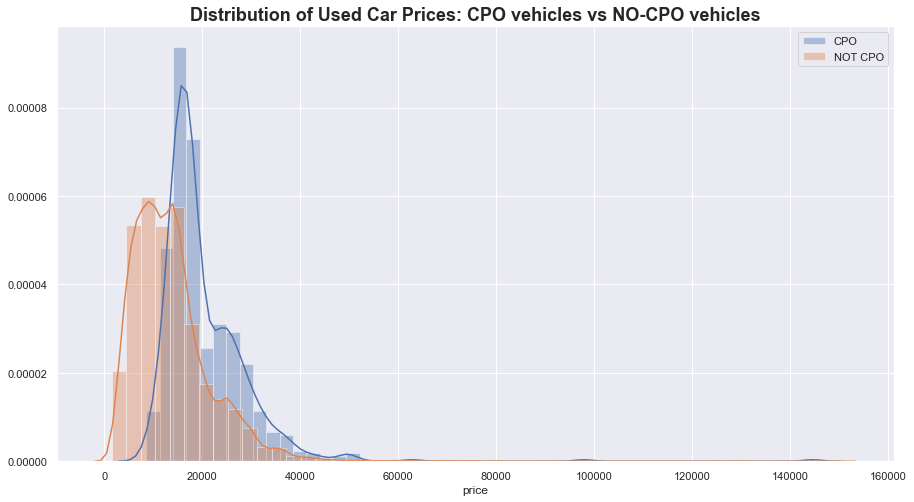

In [27]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.distplot(df.price[df['cpo']==True],hist_kws={"label":'CPO'})
sns.distplot(df.price[df['cpo']==False],hist_kws={"label":'NOT CPO'})
plt.title('Distribution of Used Car Prices: CPO vehicles vs NO-CPO vehicles',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

In [82]:
## conduct a KS test to see if these two distributions are identical
from scipy import stats
price_cpo = df[df.cpo==True].price.values
price_non_cpo = df[df.cpo==False].price.values
stats.ks_2samp(price_cpo, price_non_cpo)

Ks_2sampResult(statistic=0.45112701470102784, pvalue=6.489083413003742e-111)

The distributions between cpo and non-cpo are significantly different from observing the above graph and we can see that cpo vehicles have overall higher prices than non-cpo vehicles. 

By conducting a KS test, we can also notice that the pvalue is extremely small so that we will confidently reject the null hypothesis that the two distributions are identical.

Therefore, whether this car is certified pre-owned matters in predicting resell prices.

## 2.4 Will the title of vehicles impact the resale price?

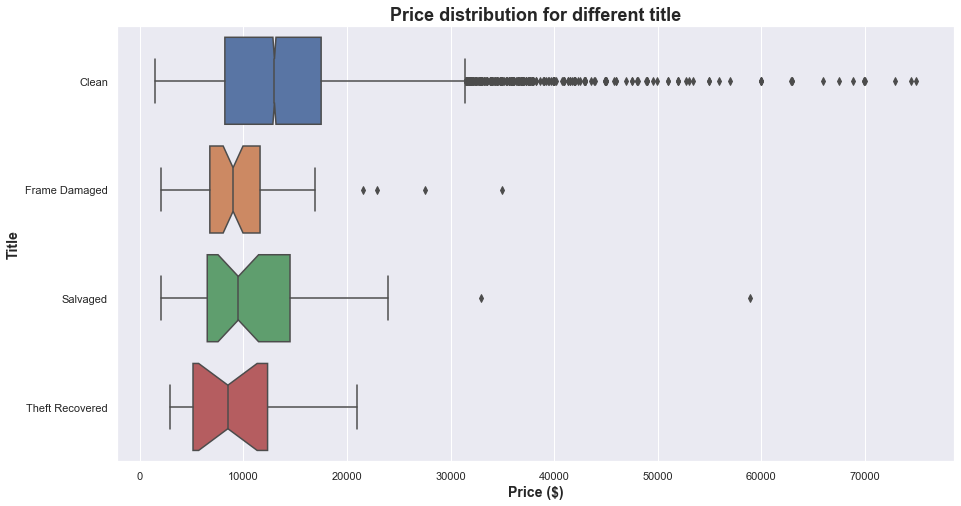

In [28]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# In order to better visualize the impact, I will restrict the price under 75000
sns.boxplot(x='price',y='title',data=df[df.price <= 75000],
            order=sorted(df.title.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Title',fontsize=14,fontweight="bold")
plt.title('Price distribution for different title',fontsize=18,fontweight="bold")
plt.show()

The title variable definitely matters to some extent in determining the resell price. Vehicles without clean titles, such as frame-damaged cars, salvaged cars and theft-recovered cars, normally have less reliable safety performane, thus will be listed as a lower price compared with clean-title vehicles.

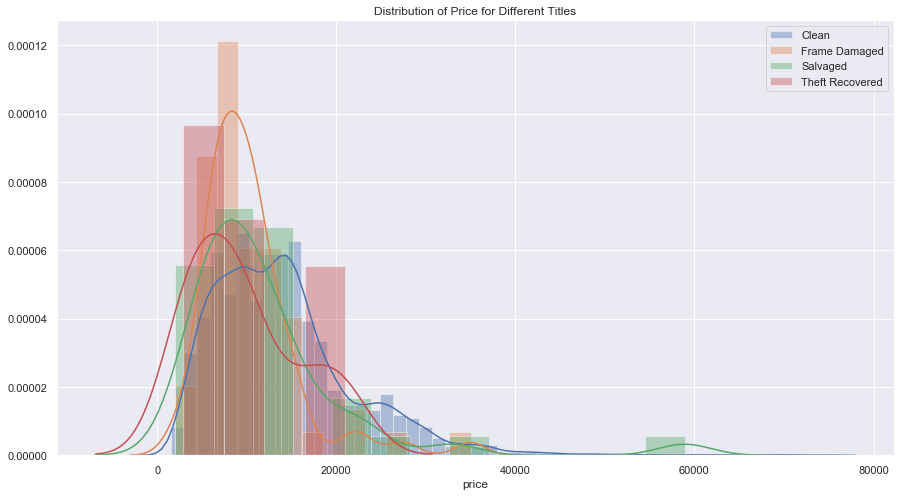

In [29]:
## In order to better visualize, I exclude the cars whose prices are over 75000
## Also get rid of Lemon car since there is only one data point
sns.set(rc={"figure.figsize": (15, 8)})
sns.distplot(df.price[(df['title']== 'Clean')&(df.price<75000)],hist_kws={"label":'Clean'})
sns.distplot(df.price[(df['title']== 'Frame Damaged')&(df.price<75000)],hist_kws={"label":'Frame Damaged'})
sns.distplot(df.price[(df['title']== 'Salvaged')&(df.price<75000)],hist_kws={"label":'Salvaged'})
sns.distplot(df.price[(df['title']== 'Theft Recovered')&(df.price<75000)],hist_kws={"label":'Theft Recovered'})

plt.title('Distribution of Price for Different Titles')
plt.legend()
plt.show()

The density plot above also shows that the clean title vehicles have relatively higher prices compared with other three types. However, the difference does not seem to be large enough.

## 2.5 How are the prices distributed at different states?

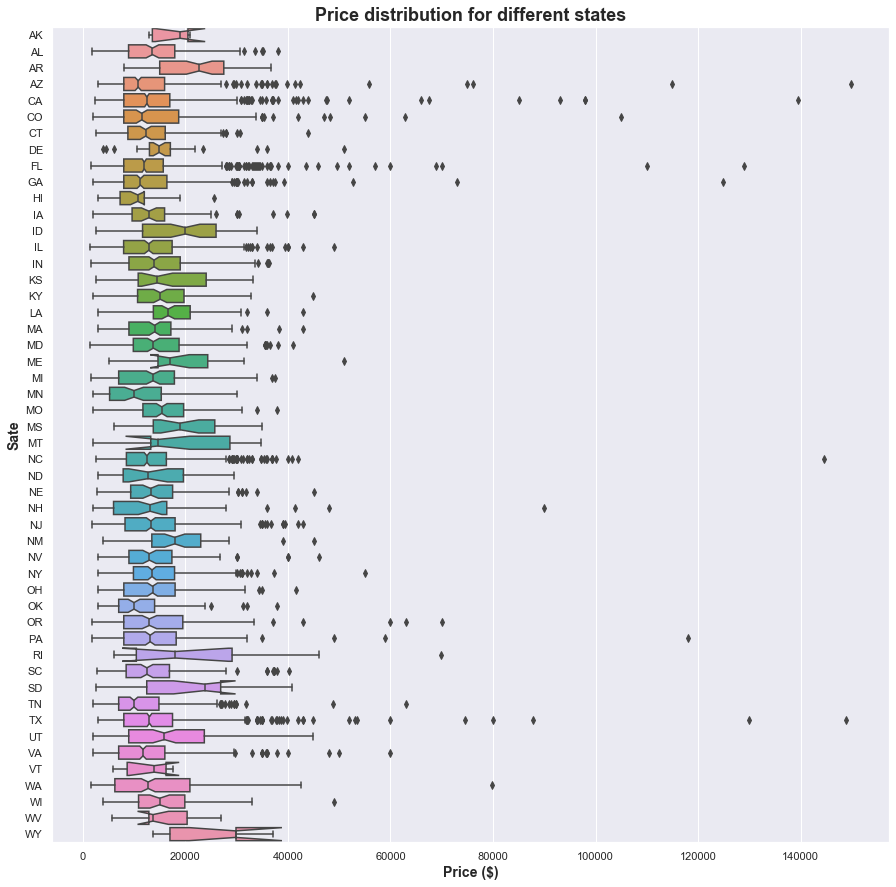

In [30]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.boxplot(x='price',y='state',data=df,
            order=sorted(df.state.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Sate',fontsize=14,fontweight="bold")
plt.title('Price distribution for different states',fontsize=18,fontweight="bold")
plt.show()

The differences of distributions of used car prices in different states seems not significant. However, it's hard to detect in this plots. 

People always say that the prices of used car in CA is higher than out of CA. Sometimes, people are also curious if the used car prices in CA and TX are different.

Therefore, I decided to run two comparisons between CA and non-CA, between CA and TX. 

However, due to time constraints, I don't have time to do matching to do the comparison. Instead, I will use visualization tools such as histogram and density plot to see if there are significant differences.

## 2.5.1 Do used cars in CA and non-CA have different prices?

In [94]:
# Add the treat variable to indicate whether the data is in CA or not.
# Assuming in CA as the treatment group, not in CA as the control group.
df['treat']=df.state.apply(lambda x: 'CA' if x == 'CA' else 'non-CA')
df['cpo'] = df['cpo'].map({True:1, False:0})
df.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner,treat
0,2017,BMW,['X3'],xDrive28i AWD,Marietta,GA,77549,16709,Mineral White Metallic,Mocha,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,1,non-CA
1,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Deland,FL,11624,26985,Shadow Black,Medium Earth Gray,...,Automatic,4WD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",0,0,Personal or Rental Use,Clean,1,non-CA
2,2018,GMC,"['Savana', 'Cargo', 'Van']",2500 Short Wheelbase,Pelham,AL,23997,19990,Summit White,Unknown,...,Automatic,RWD,Gas,"['Cruise Control', 'Backup Camera']",0,0,Personal or Rental Use,Clean,1,non-CA
3,2017,Nissan,['Rogue'],SV AWD,Palmetto Bay,FL,78116,9997,Magnetic Black,Charcoal,...,Automatic,AWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Back...",0,2,Fleet or Mixed Use,Clean,1,non-CA
4,2017,Toyota,['RAV4'],XLE AWD,Great Falls,MT,189335,13495,Super White,Black,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,1,non-CA


In [95]:
# The simple comparison of average price is not significantly different, 
# but we would like to use graph to check if this is true
print(df[df.state=='CA']['price'].mean(),df[df.state=='CA']['price'].median())
print(df[df.state!='CA']['price'].mean(),df[df.state!='CA']['price'].median())

14060.94804010939 12800.0
14516.884888038709 12999.0


The median and mean prices for CA and non-CA are pretty similar.

Let's look at the histogram below.

treat
CA        AxesSubplot(0.125,0.125;0.775x0.755)
non-CA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

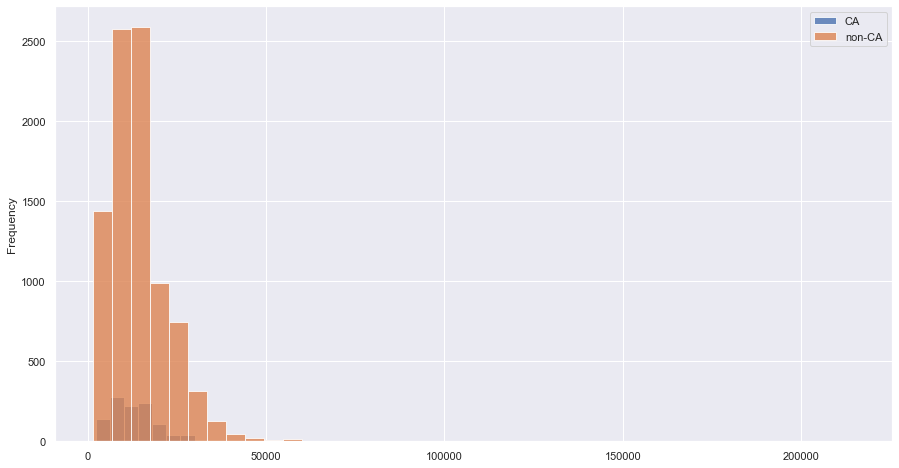

In [106]:
df.groupby('treat')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True, figsize = (15,8))

Histogram looks also very similar. But due to the different number of car listings inside and outside CA, this comparison may not be that obvious.

So let's see the density plots.

treat
CA        AxesSubplot(0.125,0.125;0.775x0.755)
non-CA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

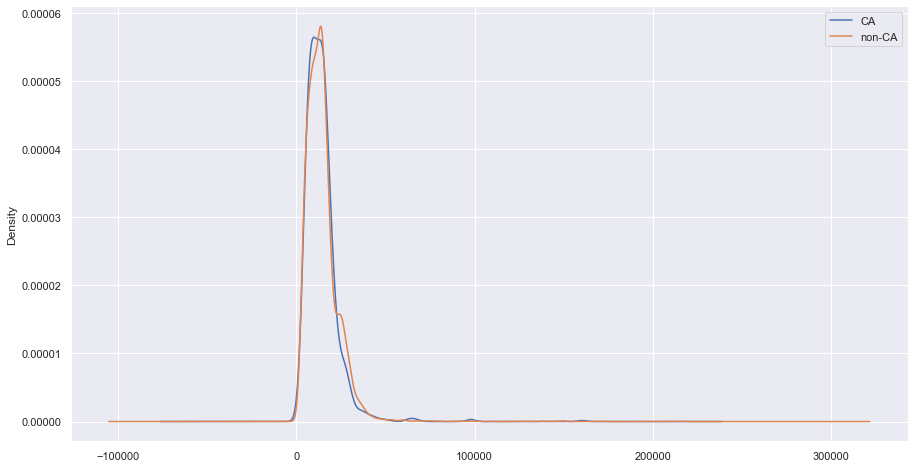

In [99]:
df.groupby('treat')['price'].plot(kind='kde', legend=True, figsize = (15,8))

The price density plots of CA and non-CA are very similar. If we assume all other variable distributions (mean and sd) are similar between CA and non-CA, then we are confident to say that the vehicle prices between CA and non-CA are very close. So people's common sense is probably wrong.

However, if we want to conduct a better comparison, the matching algorithm such as greedy matching utilizing nearest neighbors can be applied to control all other confounding variables. Then we can have a better comparison to see if the car in CA has a different price from the similar car out of CA.

## 2.5.1 Do cars in TX and CA have different prices?

In [107]:
test = df[df.state=='TX']
control = df[df.state=='CA']
total = pd.concat([test, control])
total.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner,treat
38,2014,Mercedes-Benz,['CL'],CL 550 4MATIC,Addison,TX,44370,33988,Diamond White Metallic,Black,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,2,non-CA
99,2016,Ford,['Fusion'],Titanium FWD,Dallas,TX,78117,9977,Oxford White,Charcoal Black,...,Automatic,FWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Blue...",0,1,Personal or Rental Use,Clean,2,non-CA
103,2017,Volkswagen,['Jetta'],1.4T S Auto,Austin,TX,116000,7570,Black,Black / Palladium Grey,...,Automatic,FWD,Gas,"['Front Heated Seats', 'Backup Camera', 'Cruis...",0,3,Personal or Rental Use,Clean,1,non-CA
105,2017,Chevrolet,['Cruze'],LT with 1SD Sedan Automatic,Houston,TX,84927,9114,Tungsten Metallic,Jet Black,...,Automatic,FWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Blue...",0,0,Fleet or Mixed Use,Clean,2,non-CA
120,2004,Lexus,['GS'],GS 300,Spring,TX,159685,4900,Millennium Silver Metallic,Light Charcoal,...,Automatic,RWD,Gas,[],0,0,Personal or Rental Use,Clean,4,non-CA


state
CA    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

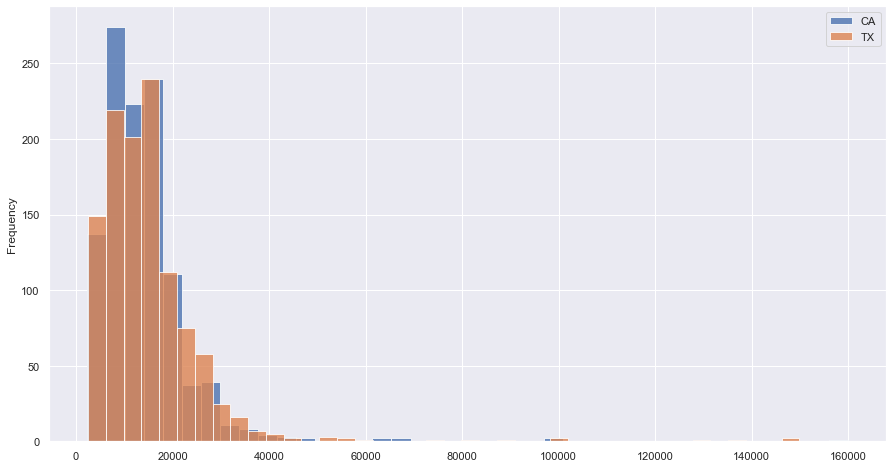

In [109]:
total.groupby('state')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True, figsize=(15,8))

state
CA    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

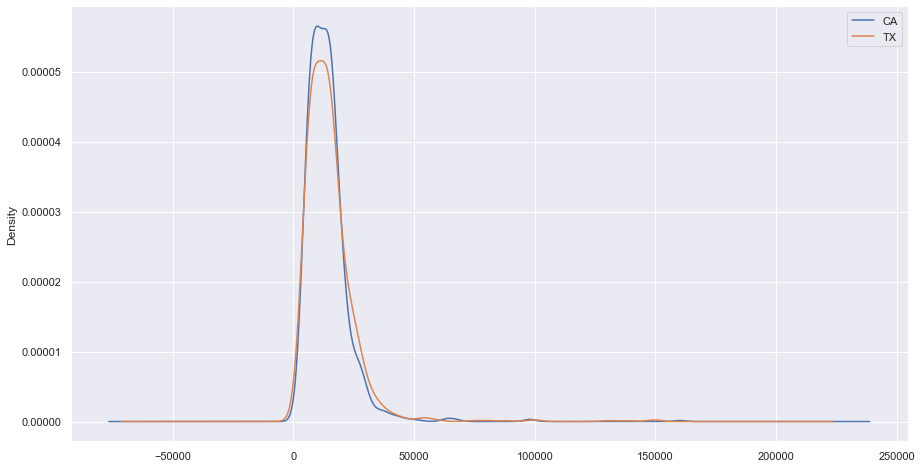

In [110]:
total.groupby('state')['price'].plot(kind='kde', legend=True, figsize = (15,8))

From the above two plots, I didn't see any big differences of used car pricing between CA and TX.

## 2.6 How will the mileage impact resale price?

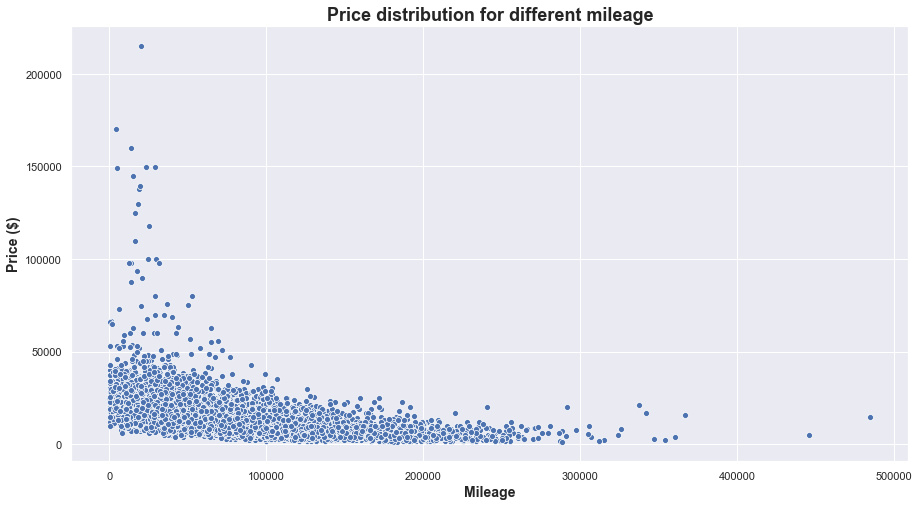

In [111]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mileage',y='price',data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Price distribution for different mileage',fontsize=18,fontweight="bold")
plt.show()

From the above plot, we can conclude that there is a decreasing trend of price when the mileage increases.

## 2.7 How will the fuel_type impact resale price? Is the resale price for alternative vehicles higher?

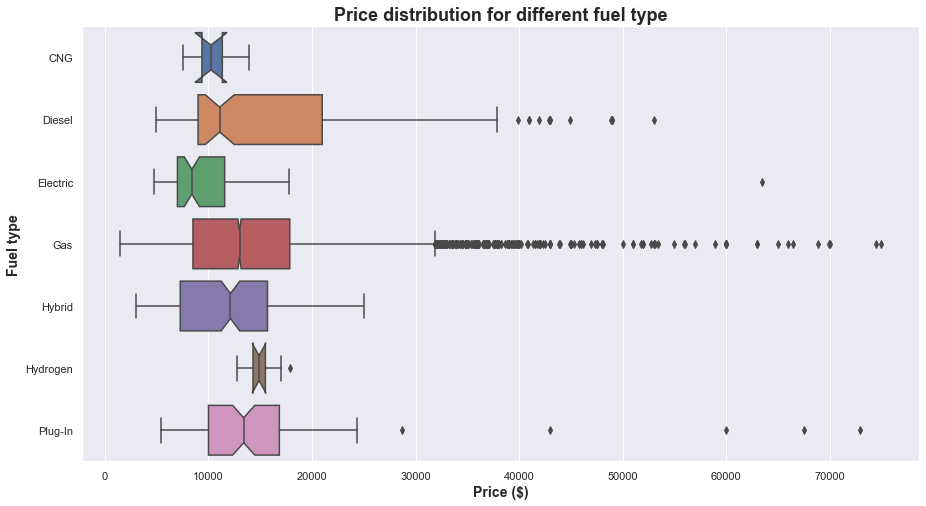

In [112]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# in order to better visualize, I will limit the price under 75000
sns.boxplot(x='price',y='fuel_type',data=df[df.price <= 75000],
            order=sorted(df.fuel_type.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Fuel type',fontsize=14,fontweight="bold")
plt.title('Price distribution for different fuel type',fontsize=18,fontweight="bold")
plt.show()

fuel_type
CNG         AxesSubplot(0.125,0.125;0.775x0.755)
Diesel      AxesSubplot(0.125,0.125;0.775x0.755)
Electric    AxesSubplot(0.125,0.125;0.775x0.755)
Gas         AxesSubplot(0.125,0.125;0.775x0.755)
Hybrid      AxesSubplot(0.125,0.125;0.775x0.755)
Hydrogen    AxesSubplot(0.125,0.125;0.775x0.755)
Plug-In     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

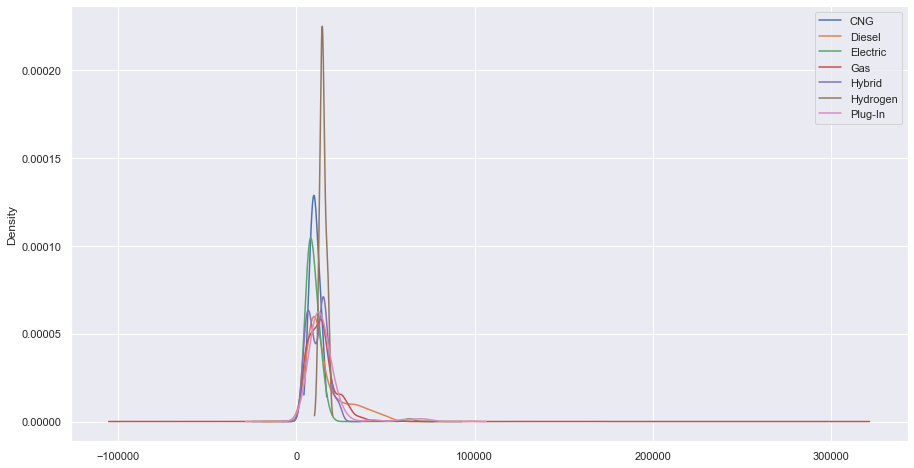

In [115]:
df.groupby('fuel_type')['price'].plot(kind='kde', legend=True, figsize = (15,8))

From the above two plots, I didn't observe significant differences of prices among diferent fuel type technologies. 

## 2.8 How will the mpg impact resale price?
Since mpg is highly related to fuel type, so I will use different colors for different fuel type

### City mpg first

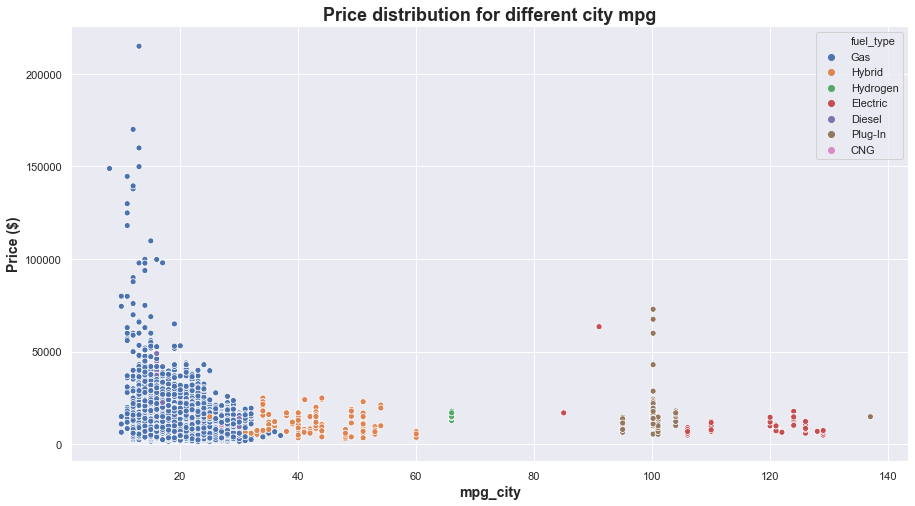

In [116]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mpg_city',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_city',fontsize=14,fontweight="bold")
plt.title('Price distribution for different city mpg',fontsize=18,fontweight="bold")
plt.show()

### Highway mpg

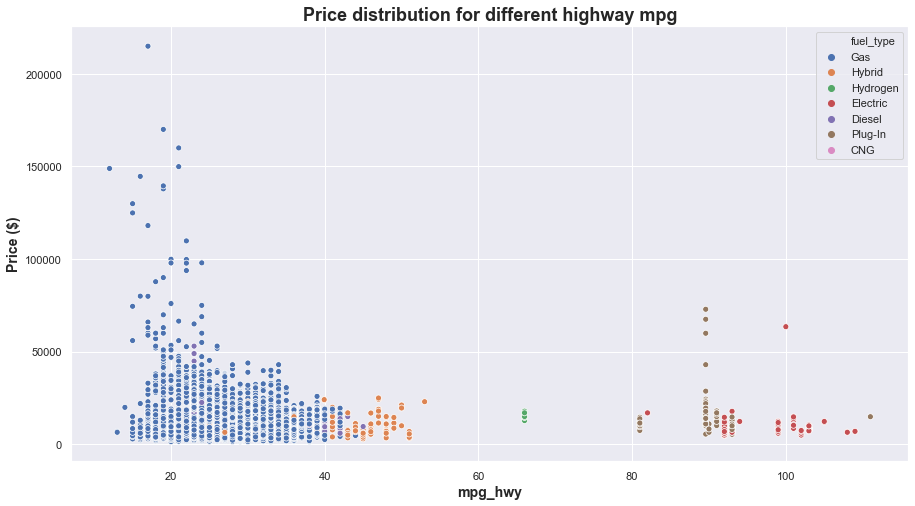

In [117]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mpg_hwy',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_hwy',fontsize=14,fontweight="bold")
plt.title('Price distribution for different highway mpg',fontsize=18,fontweight="bold")
plt.show()

From the above two graphs between price and mpg (hwy and city), I noticed that most of the high-priced used cars are gasoline cars. This is easy to intepret since most of the luxury cars are gasoline type. Also for the gasoline cars, a lower mpg normally means a higher price from the plot since luxury cars are not that fuel efficient.

Another findings is that for the alternative fuel vehicles such as Plug-in, electric, hydrogen, even though their mpg is very high, their prices are relatively stable under 30k except for some plug-in cars. The reason is that the alternative fuel vehicles normally do not belong to luxury class, such as Volt, Bolt and Nissan Leaf. But for some plug-in cars, there are some mid-to-luxury cars such as Porsche plug-ins or Tesla.

# 3. Popular feature analysis

In order to understand what kind of vehicle features are popular in the used car listings, I decided to analyze the popular feature columns based on their frequencies. 

In [118]:
df.popular_feature.head(10)

0                                                   []
1     ['Cruise Control', 'Bluetooth', 'Backup Camera']
2                  ['Cruise Control', 'Backup Camera']
3    ['Front Heated Seats', 'Cruise Control', 'Back...
4                                                   []
5     ['Cruise Control', 'Bluetooth', 'Backup Camera']
6                                                   []
7    ['Power Trunk/Liftgate', 'Remote Engine Start'...
8                                                   []
9     ['Cruise Control', 'Bluetooth', 'Backup Camera']
Name: popular_feature, dtype: object

In [119]:
## get the index of empty features data rows from the dataset
empty_index = []
for i in range(len(df)):
    if len(df.popular_feature[i]) == 2:
        empty_index.append(i)
len(empty_index)

3718

In [120]:
## exact rows with at least one feature inside.
new_df = df.drop(empty_index)

In [121]:
new_df['feature_set'] = new_df.popular_feature.apply(lambda x: x[1:-1].split(', '))
len(new_df)

6266

In [123]:
# Create a bag of features in order to count the frequencies.
new_df['features'] = None
feature_bag = []
for i in new_df.index:
    new_df['features'][i] = [feature[1:-1] for feature in new_df.feature_set[i]]
    for feature in new_df.feature_set[i]:
        feature_bag.append(feature[1:-1])
print(new_df.features.head())
print(feature_bag[:10])


1           [Cruise Control, Bluetooth, Backup Camera]
2                      [Cruise Control, Backup Camera]
3    [Front Heated Seats, Cruise Control, Backup Ca...
5           [Cruise Control, Bluetooth, Backup Camera]
7    [Power Trunk/Liftgate, Remote Engine Start, Bl...
Name: features, dtype: object
['Cruise Control', 'Bluetooth', 'Backup Camera', 'Cruise Control', 'Backup Camera', 'Front Heated Seats', 'Cruise Control', 'Backup Camera', 'Remote Engine Start', 'Blind Spot System']


In [124]:
# Make a counter object to count the frequencies of each popular features
count = Counter(feature_bag)
count

Counter({'Cruise Control': 6199,
         'Bluetooth': 5575,
         'Backup Camera': 4594,
         'Front Heated Seats': 2350,
         'Remote Engine Start': 2176,
         'Blind Spot System': 1253,
         'Power Trunk/Liftgate': 940,
         'Lane Keep Assist': 591,
         'Moonroof': 1152,
         'Navigation': 1271,
         'Front Cooled Seats': 386})

In [125]:
print('The top 3 features are Cruise Control, Bluetooth and Backup Camera, \
and there are {:.0%} with Cruise Control, {:.0%} with Bluetooth and {:.0%} with \
Backup Camera'.format(5864/len(new_df), 5214/len(new_df), 4285/len(new_df)))

The top 3 features are Cruise Control, Bluetooth and Backup Camera, and there are 94% with Cruise Control, 83% with Bluetooth and 68% with Backup Camera


Text(0, 0.5, 'Counts')

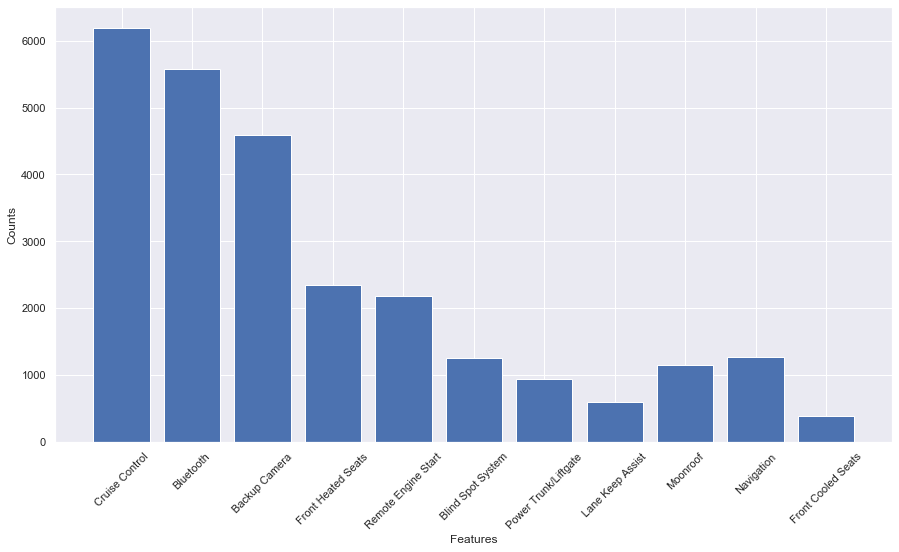

In [126]:
# Counts of features in Listings
plt.figure(figsize=(15,8))
plt.bar(count.keys(), count.values())
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Counts')